<a href="https://colab.research.google.com/github/LucasMonteiroBastos/REGRESSAO_PLANO_DE_SAUDE/blob/main/REGRESS%C3%83O_PLANO_DE_SA%C3%9ADE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objetivo: Construir um modelo de Regressão Linear para fazermos a previsão de quanto irá custar o plano de saúde para uma pessoa, dependendo da idade do individuo.

BIBLIOTECAS


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

LENDO A BASE

In [ ]:
base_plano_saude = pd.read_csv('/content/plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


CRIANDO VARIAVEIS

In [ ]:
# x - atributo previsor
X_plano_saude = base_plano_saude.iloc[:,0].values
X_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [ ]:
# y - custo do plano de saúde
y_plano_saude = base_plano_saude.iloc[:,1].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

COEFICIENTE DE CORRELAÇAO

In [ ]:
np.corrcoef(X_plano_saude,y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

FORMATO DAS VARIAVEIS

In [ ]:
X_plano_saude.shape # matrix, uma dimensão somente, obs: precisamos colocar em duas dimensoes

(10,)

In [ ]:
 # transformando em matrix
 X_plano_saude = X_plano_saude.reshape(-1,1)
 X_plano_saude.shape


(10, 1)

REGRESSÃO LINEAR

In [ ]:
from sklearn.linear_model import LinearRegression
regressao_plano_saude = LinearRegression()

FAZENDO O TREINAMENTO

In [ ]:
regressao_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

In [ ]:
# b0
regressao_plano_saude.intercept_

-558.9490909090912

In [ ]:
# b1
regressao_plano_saude.coef_

array([61.86787879])

PREVISOES

In [ ]:
previsoes = regressao_plano_saude.predict(X_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

GRAFICO PARA MOSTRAR AS PREVISOES

In [ ]:
X_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [ ]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsoes, name = 'Regressao')
grafico.show()

SCORE

In [ ]:
regressao_plano_saude.score(X_plano_saude, y_plano_saude) # quanto mais proximo de 1, melhor o valor

0.8666112727879174

 RESIDUALS
 

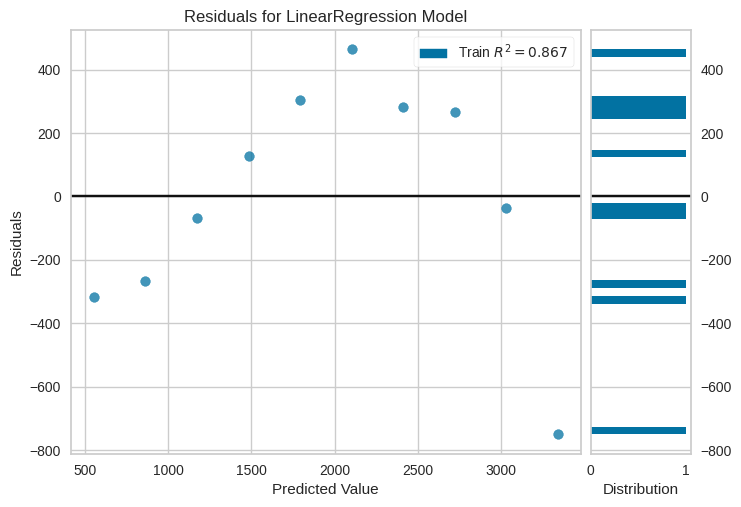

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressao_plano_saude)
visualizador.fit(X_plano_saude, y_plano_saude)
visualizador.poof()

BASE DE DADOS PLANO DE SAÚDE: REGRESSÃO POLINOMIAL


In [ ]:
base_plano_saude2 = pd.read_csv('/content/plano_saude2.csv')
base_plano_saude2

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


DEFININDO AS VARIAVEIS PREVISOES E CLASSE (X & Y)

In [ ]:
X_plano_saude2 = base_plano_saude2.iloc[:,0:1].values

y_plano_saude2 = base_plano_saude2.iloc[:, 1].values

In [ ]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [ ]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

APLICAÇÃO DA REGRESSÃO POLINOMIAL

In [ ]:
  from sklearn.preprocessing import PolynomialFeatures
  poly = PolynomialFeatures(degree=2)
  X_plano_saude2_poly = poly.fit_transform(X_plano_saude2)

IMPLEMENTANDO O MODELO DE REGRESSÃO LINEAR

In [ ]:
regressor_saude_polinomial = LinearRegression()
regressor_saude_polinomial.fit(X_plano_saude2_poly, y_plano_saude2) 

LinearRegression()

In [ ]:
# b0
regressor_saude_polinomial.intercept_

7133.836363636174

In [ ]:
# b1 (n)
regressor_saude_polinomial.coef_

array([   0.        , -469.89393939,    7.82121212])

PREVISOES

In [ ]:
previsoes = regressor_saude_polinomial.predict(X_plano_saude2_poly)
previsoes

array([1209.81818182,  463.6969697 ,  108.63636364,  144.63636364,
        571.6969697 , 1389.81818182, 2599.        , 4199.24242424,
       6190.54545455, 8572.90909091])

GRAFICO

In [ ]:
grafico = px.scatter(x = X_plano_saude2[:,0], y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2[:,0], y = previsoes, name='Regressao')
grafico.show()